In [1]:
import pooch

url = "https://github.com/juoceano/geoquimica_marinha/releases/download/"
version = "v0.0.1.dev"

fname = pooch.retrieve(
    url=f"{url}/{version}/Pratica_Campo_Geoquimica_20221.xlsx",
    known_hash="sha256:fd0c72203a143c12f91a0524bd54e884b6b075aae4e06cf9d4c50343310c13f6",
)

In [2]:
import pandas as pd

df1 = pd.read_excel(fname, index_col="Amostra", sheet_name=1)
df1 = df1.clean_names(strip_underscores=True)

df1["materia_organica"] *= 100
df1

,cadinho,peso_cadinho_g,peso_amostra_g,peso_cadinho_apos_mufla_g,materia_organica
Amostra,,,,,
IGT01,4,36.063,2.038,36.582,74.533857
IGT02,14-5A,35.003,2.027,35.560,72.520967
IGT03,19,26.662,2.042,27.694,49.461312
IGT04,9-8B,37.319,2.018,37.823,75.024777
IGT05,7B,36.612,2.000,37.457,57.750000
SDD01,22-2B,36.283,2.013,37.951,17.138599
SDD01.1,6,26.721,2.063,28.516,12.990790
SDD(PTO)03,21,24.640,2.039,26.337,16.772928
SDD04,18-4B,35.605,2.051,37.484,8.386153


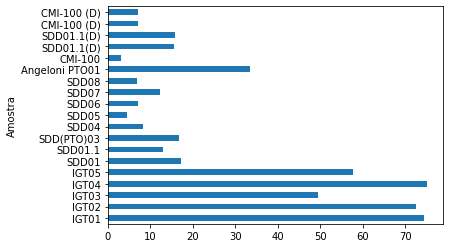

In [3]:
col = "materia_organica"

df1 = df1.loc[df1[col] > 0]
df1[col].plot.barh();

In [4]:
df2 = pd.read_excel(fname, index_col="Amostra", sheet_name=2)
df2 = df2.clean_names(strip_underscores=True)

df2["materia_organica"] *= 100
df2

,erlenmeyer,peso_erlenmeyer_g,peso_amostra_g,peso_apos_estufa_g,materia_organica
Amostra,,,,,
IGT01,1,52.960,0.508,53.222,48.425197
IGT02,2,60.930,0.502,61.187,48.804781
IGT03,3,50.185,0.500,50.499,37.200000
IGT04,4,64.767,0.503,65.076,38.568588
IGT05,5,52.893,0.504,53.196,39.880952
SDD01,6,57.762,0.547,58.338,-5.301645
SDD01.1,7,56.654,0.514,57.180,-2.334630
SDD(PTO)03,8,46.221,0.500,46.751,-6.000000
SDD(PTO)04,9,39.721,0.523,40.337,-17.782027


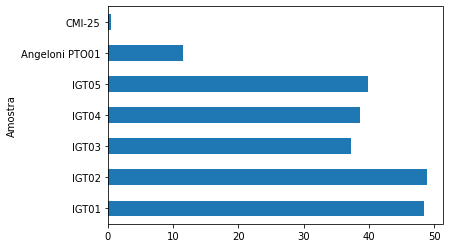

In [5]:
df2 = df2.loc[df2[col] > 0]
df2[col].plot.barh();

In [6]:
common = list(set(df1.index).intersection(df2.index))

metodo1 = df1.loc[common][col]
metodo1.name = "mufla"

metodo2 = df2.loc[common][col]
metodo2.name = "oxigenada"

df = pd.concat([metodo1, metodo2], axis=1)

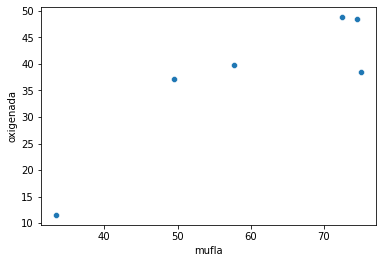

In [7]:
import seaborn

seaborn.scatterplot(data=df, x="mufla", y="oxigenada");